# PHT  - Value At Risk

***

## 1 Chuẩn bị dữ liệu : 

### 1.1 Import Data :


~~~
install.packages('quantmod')
install.packages('fBasics')
install.packages('tseries')
install.packages('anytime')
install.packages('fGarch')
install.packages('rugarch')
install.packages('Rcpp')
install.packages('devtools')
install.packages('vctrs')
~~~

```{r}
require(quantmod)
library(tseries)
library(anytime)
library(fBasics)
library(rugarch)
library(fGarch)
library(Rcpp)
library(ggplot2)
```

In [1]:
require(quantmod)
library(tseries)
library(anytime)
library(fBasics)
library(rugarch)
library(fGarch)
library(Rcpp)
library(ggplot2)

Loading required package: quantmod

Loading required package: xts

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: timeDate

Loading required package: timeSeries


Attaching package: 'timeSeries'


The following object is masked from 'package:zoo':

    time<-



Attaching package: 'fBasics'


The following object is masked from 'package:TTR':

    volatility


Loading required package: parallel


Attaching package: 'rugarch'


The following object is masked from 'package:stats':

    sigma




### 1.2 Import data:

In [13]:
GAS <- read.csv("GAS.csv", header=TRUE)

In [14]:
tail(GAS, 10)

,Date,Close
,<chr>,<dbl>
2053,2021-09-20,88800
2054,2021-09-21,88200
2055,2021-09-22,88400
2056,2021-09-23,90600
2057,2021-09-24,91000
2058,2021-09-27,90000
2059,2021-09-28,95100
2060,2021-09-29,96800
2061,2021-09-30,97000


## 2 Định dạng Data :


#### 2.1.1 Format Date Column:


In [15]:
GAS$Date <- anytime(GAS$Date)
tail(GAS)

,Date,Close
,<dttm>,<dbl>
2057,2021-09-24,91000
2058,2021-09-27,90000
2059,2021-09-28,95100
2060,2021-09-29,96800
2061,2021-09-30,97000
2062,2021-10-01,103500


#### 2.1.2 Historical prices plot:

In [16]:
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

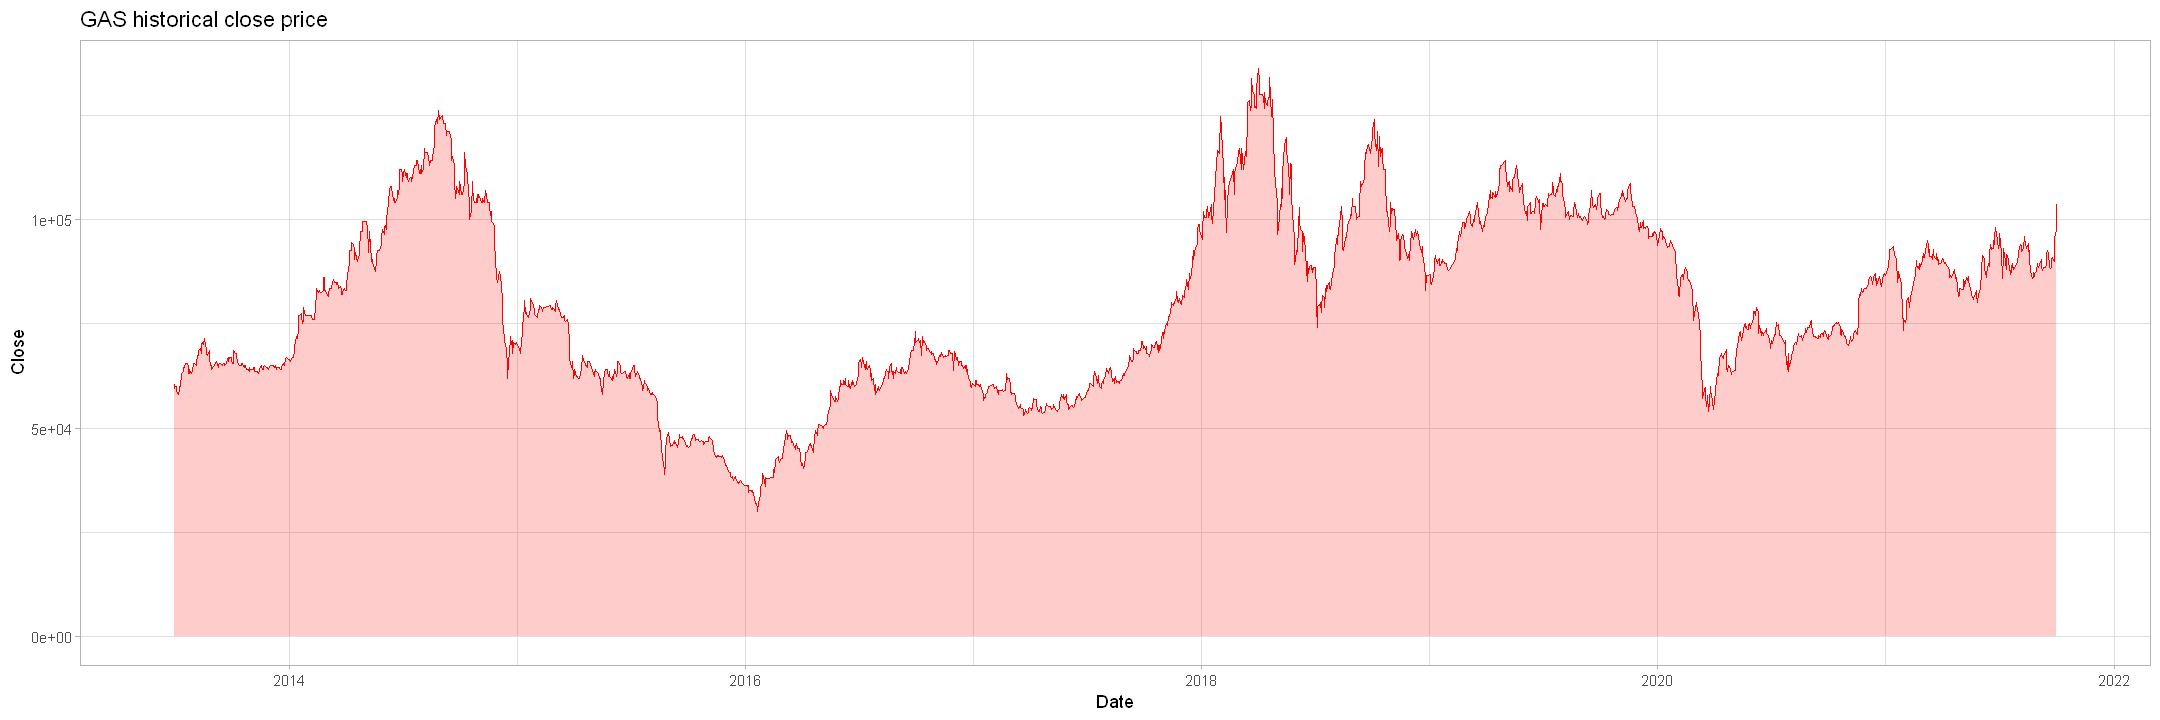

In [17]:
fig(18,6)
ggplot(GAS, aes(x=Date, y=Close)) + geom_area(alpha = 0.2, color = 'red', fill="red") + 
    theme_light() + ggtitle("GAS historical close price")

## 3 Tính Return

### 3.1 Log Return :

In [18]:
GAS$log_R <- Delt(GAS$Close, type = 'log')

In [19]:
tail(GAS, 10)

,Date,Close,log_R
,<dttm>,<dbl>,"<dbl[,1]>"
2053,2021-09-20,88800,-0.034314379
2054,2021-09-21,88200,-0.006779687
2055,2021-09-22,88400,0.002265007
2056,2021-09-23,90600,0.024582243
2057,2021-09-24,91000,0.004405293
2058,2021-09-27,90000,-0.011049836
2059,2021-09-28,95100,0.055119299
2060,2021-09-29,96800,0.017718025
2061,2021-09-30,97000,0.002063984


### 3.2 Normal Return :

In [20]:
GAS$return_norm <- Delt(GAS$Close, type = 'arithmetic')

In [21]:
head(GAS, 10)

,Date,Close,log_R,return_norm
,<dttm>,<dbl>,"<dbl[,1]>","<dbl[,1]>"
1,2013-07-01,59500,NA,NA
2,2013-07-02,60500,0.016667052,0.016806723
3,2013-07-03,60000,-0.008298803,-0.008264463
4,2013-07-04,60000,0.000000000,0.000000000
5,2013-07-05,59000,-0.016807118,-0.016666667
6,2013-07-08,58000,-0.017094433,-0.016949153
7,2013-07-09,59000,0.017094433,0.017241379
8,2013-07-10,60000,0.016807118,0.016949153
9,2013-07-11,60000,0.000000000,0.000000000


Xóa bỏ dòng đầu có NA

In [22]:
GAS = GAS[-1, ]

### 3.3 Visualize:

* Log return :

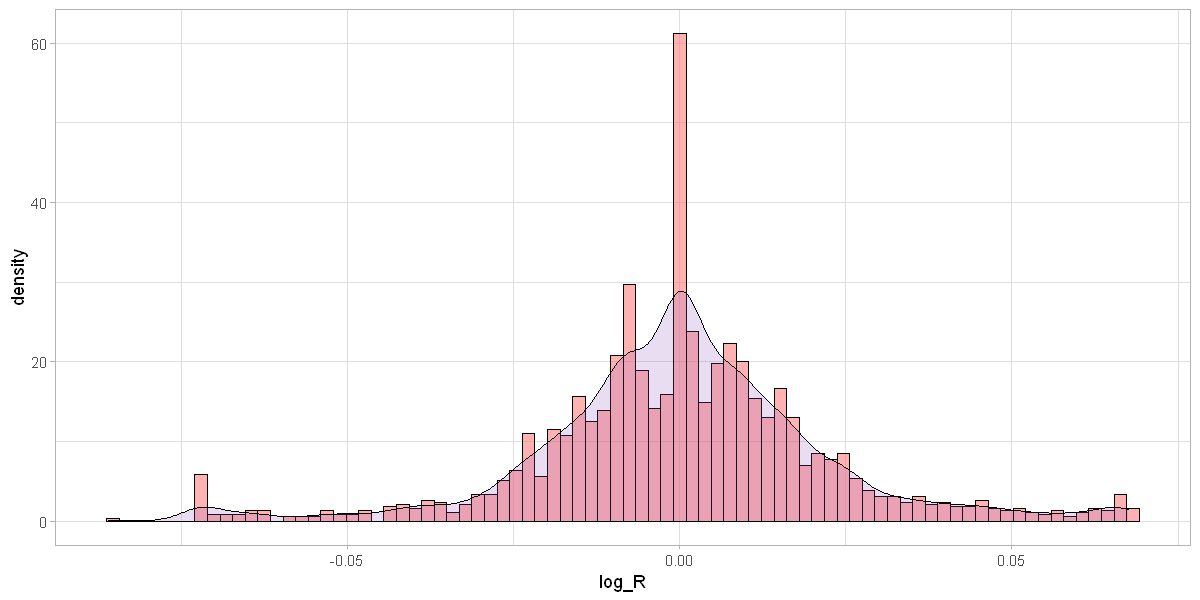

In [23]:
fig(10,5)
ggplot(GAS, aes(x=log_R)) + 
 geom_histogram(aes(y=..density..), colour="black", alpha=0.5, fill='#FF6666', bins = 82)+
 geom_density(alpha=.2, fill="#905cb8") + theme_light()

* Normal return :

In [ ]:
ggplot(GAS, aes(x=return_norm)) + 
 geom_histogram(aes(y=..density..), colour="black", alpha=0.5, fill='#FF6666', bins = 82)+
 geom_density(alpha=.2, fill="#905cb8") + theme_light()

* line plot

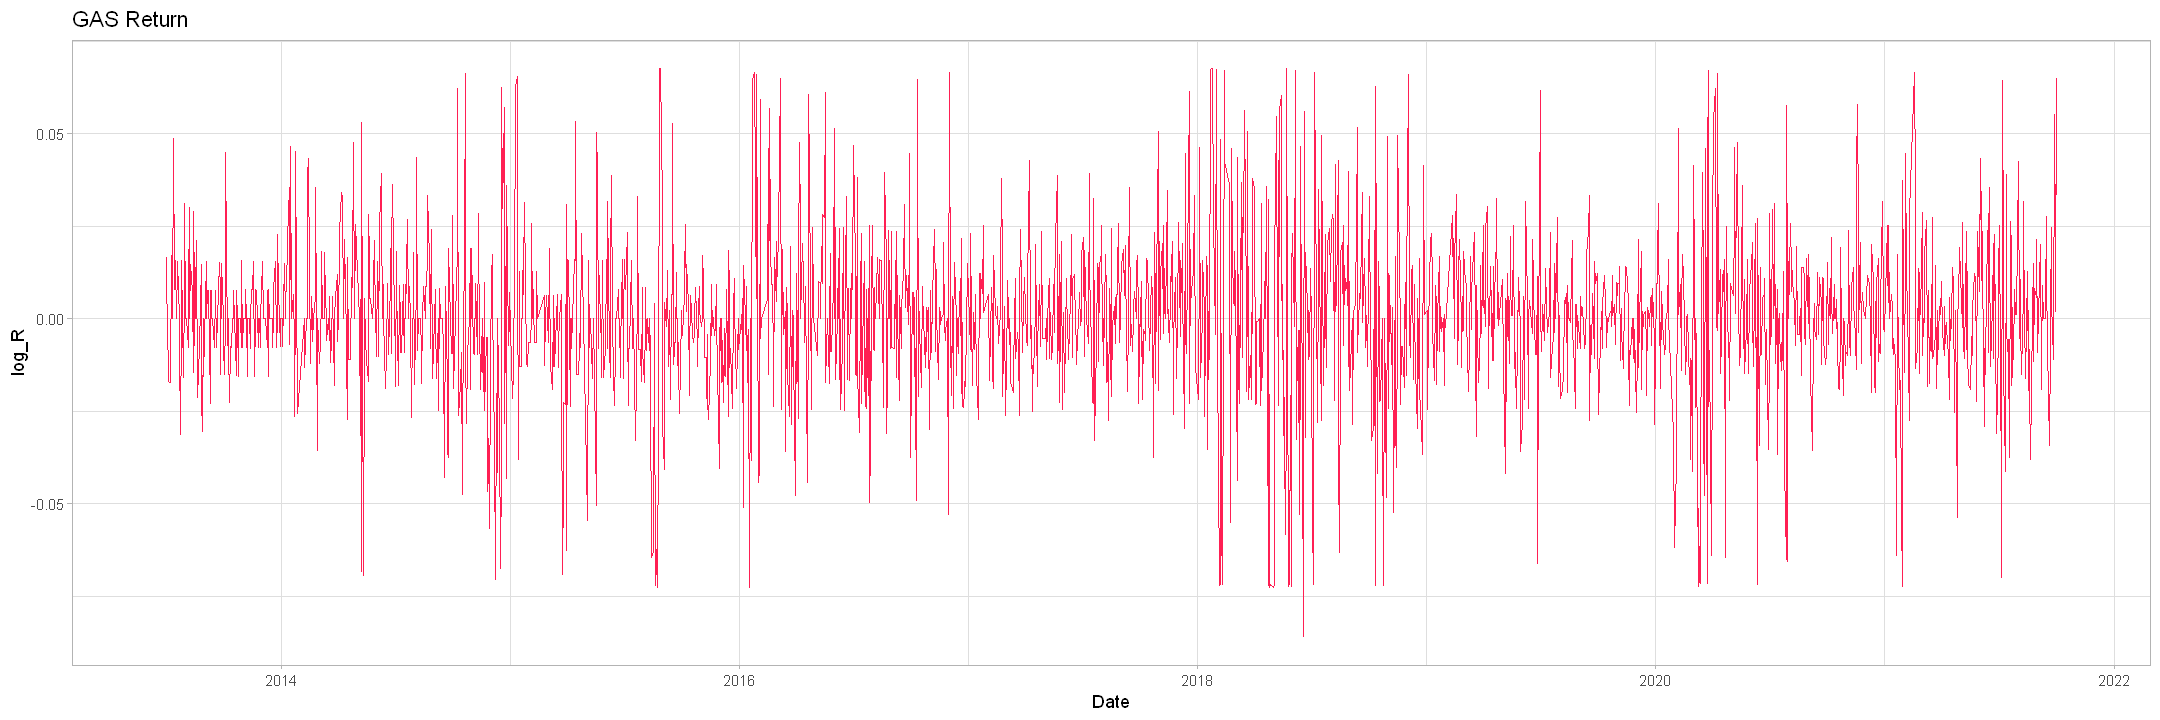

In [24]:
fig(18,6)
t1 <- ggplot(GAS, aes(x=Date)) + geom_line(aes(y = log_R), color='#ff1f53', alpha = 1) + ggtitle("GAS Return") + theme_light()
t1

## 4 Basic Stat:

### 4.1 Thống kê mô tả Return :

In [25]:
basicStats(GAS$log_R)

,Delt.1.log
,<dbl>
nobs,2061.000000
NAs,0.000000
Minimum,-0.085924
Maximum,0.067546
1. Quartile,-0.009993
3. Quartile,0.011050
Mean,0.000269
Median,0.000000
Sum,0.553595


### 4.2 hypothesis testing (Kiểm định giả thuyết thống kê):

* normality test(kiểm định phân phối chuẩn với jaqua-bera) :

$H_0$: Phân phối là chuẩn (skewness = 0, kurtosis = 3)

$H_1$: Phân phối là không chuẩn (skewness # 0, kurtosis # 3)

$P_{value} < 0.05$ bác bỏ $H_0$

In [26]:
normalTest(GAS$log_R, method = 'jb')

Warning message in if (class(x) == "fREG") x = residuals(x):
"the condition has length > 1 and only the first element will be used"



Title:
 Jarque - Bera Normalality Test

Test Results:
  STATISTIC:
    X-squared: 382.0491
  P VALUE:
    Asymptotic p Value: < 2.2e-16 

Description:
 Mon Oct 04 05:47:48 2021 by user: HP


$=>$ bác bỏ $H_0$ , phân phối của return không là phân bố chuẩn

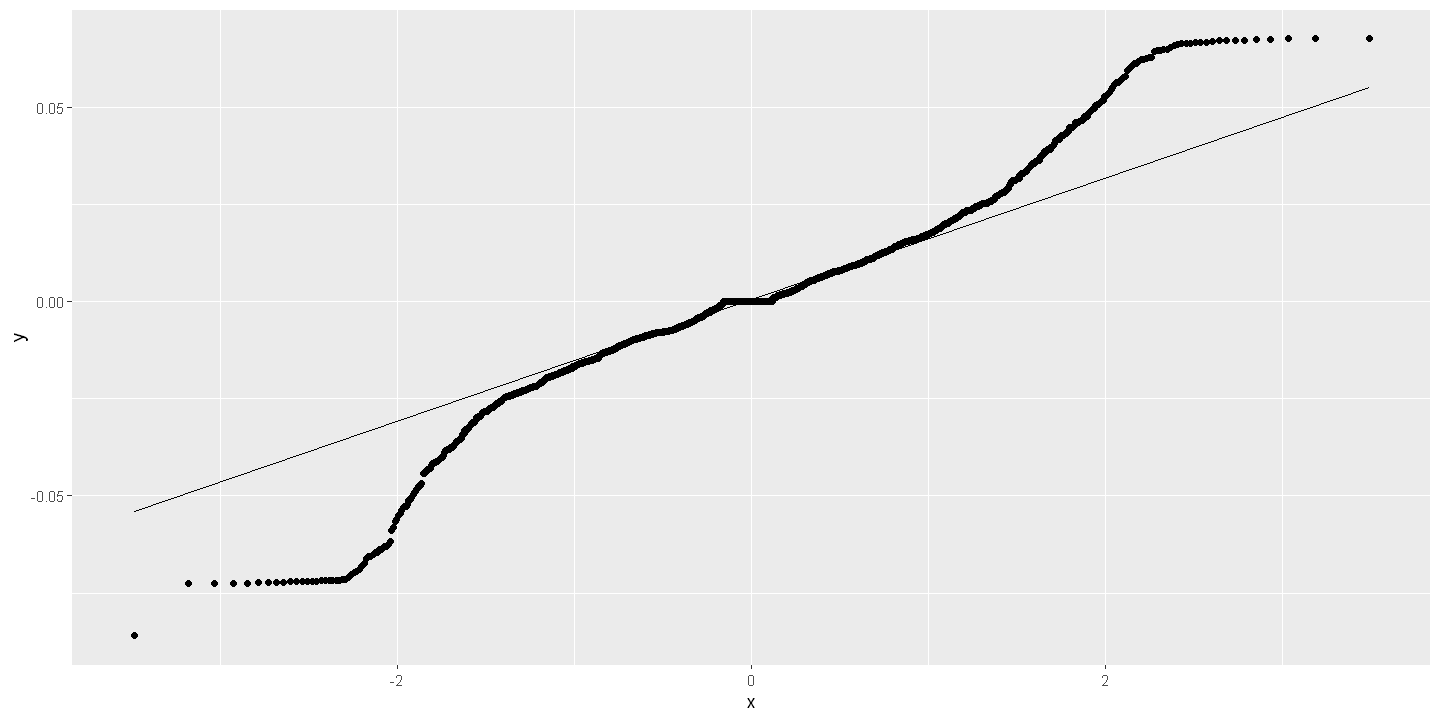

In [27]:
fig(12, 6)
ggplot(GAS, aes(sample=log_R)) + stat_qq() + geom_qq_line()

* Dickey-Fuller Test (kiểm định tính dừng )

    + $H_0$ : The h0 for this test is that there is a unit root.

    + $H_1$ : The time series is stationary (or trend-stationary).

In [31]:
adf.test(GAS$log_R)

Warning message in adf.test(GAS$log_R):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  GAS$log_R
Dickey-Fuller = -11.598, Lag order = 12, p-value = 0.01
alternative hypothesis: stationary


$=>$ bác bỏ h0 $->$ chuỗi dừng:

* Biểu đồ acf:

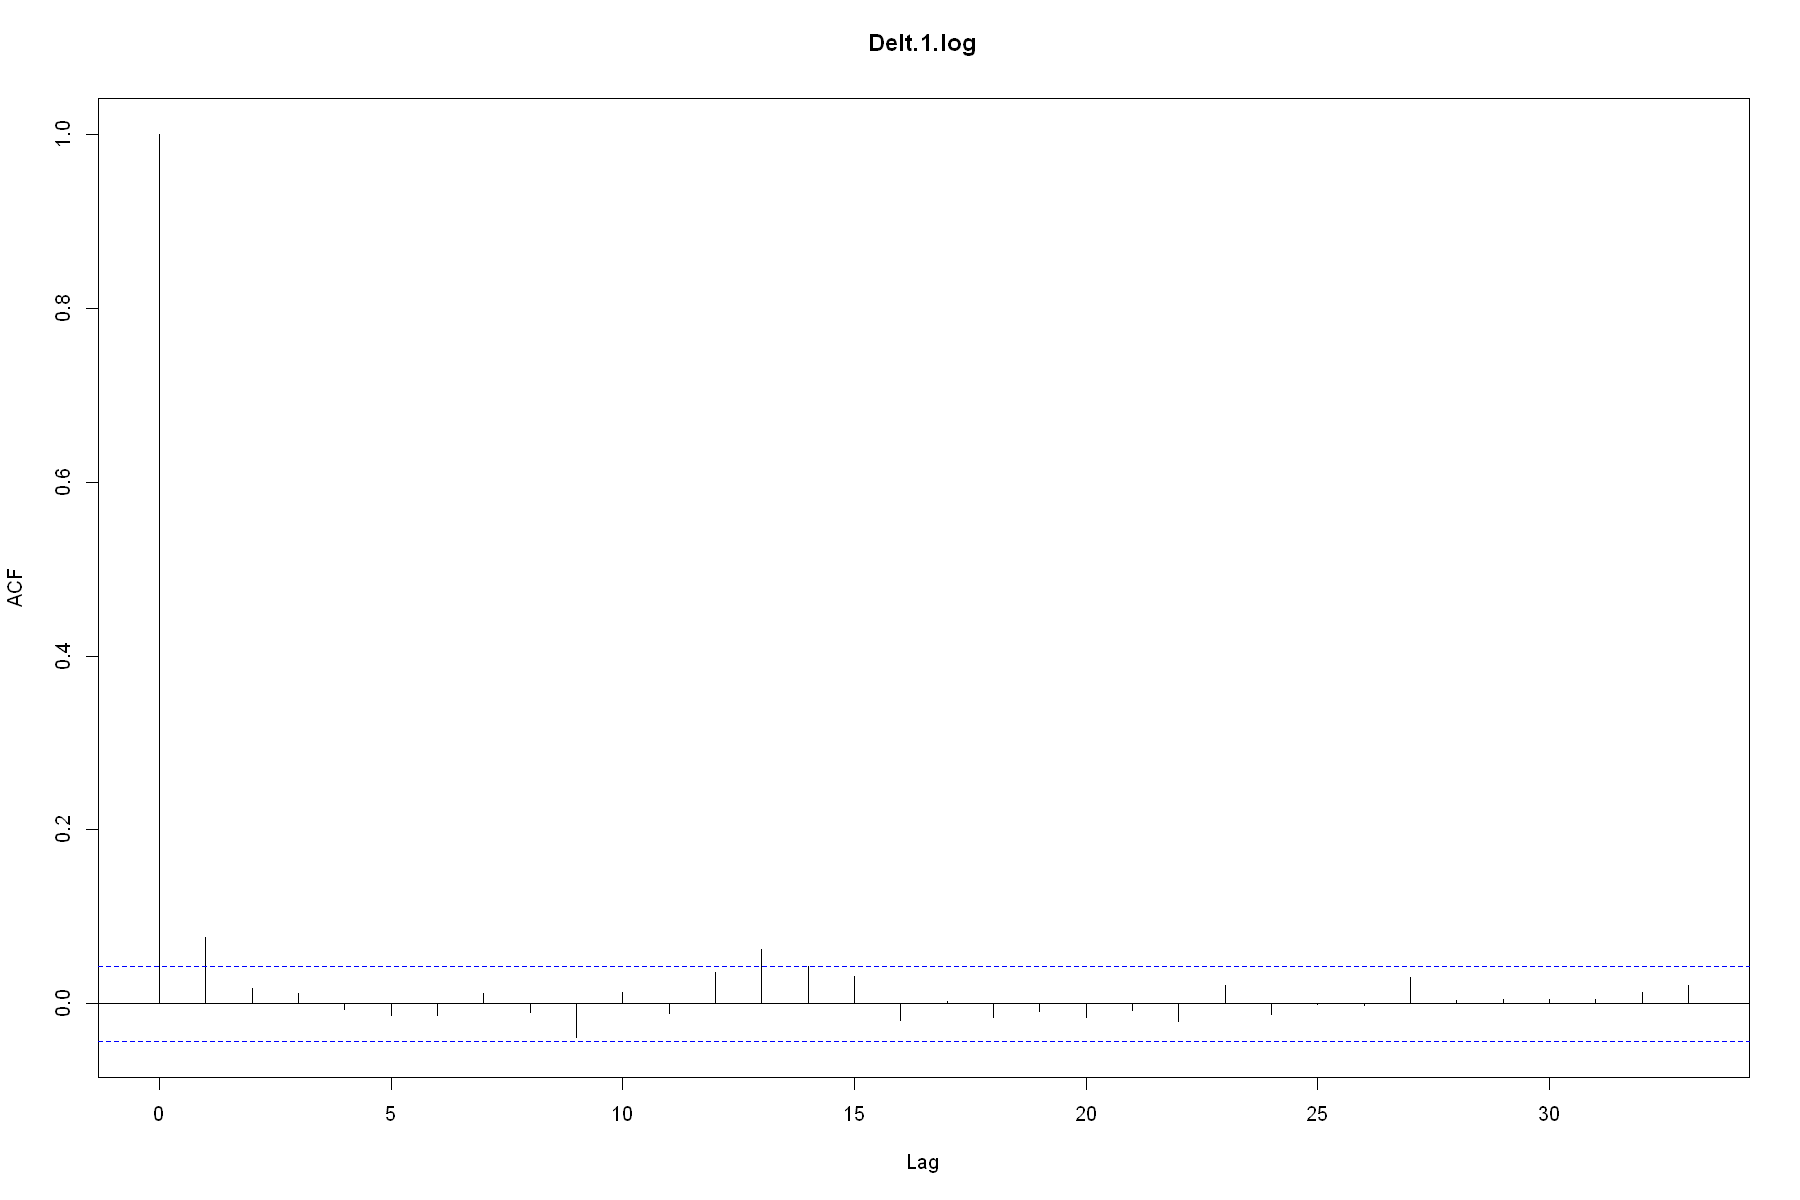

In [32]:
fig(15,10)
acf(GAS$log_R)

* biểu đồ pacf:

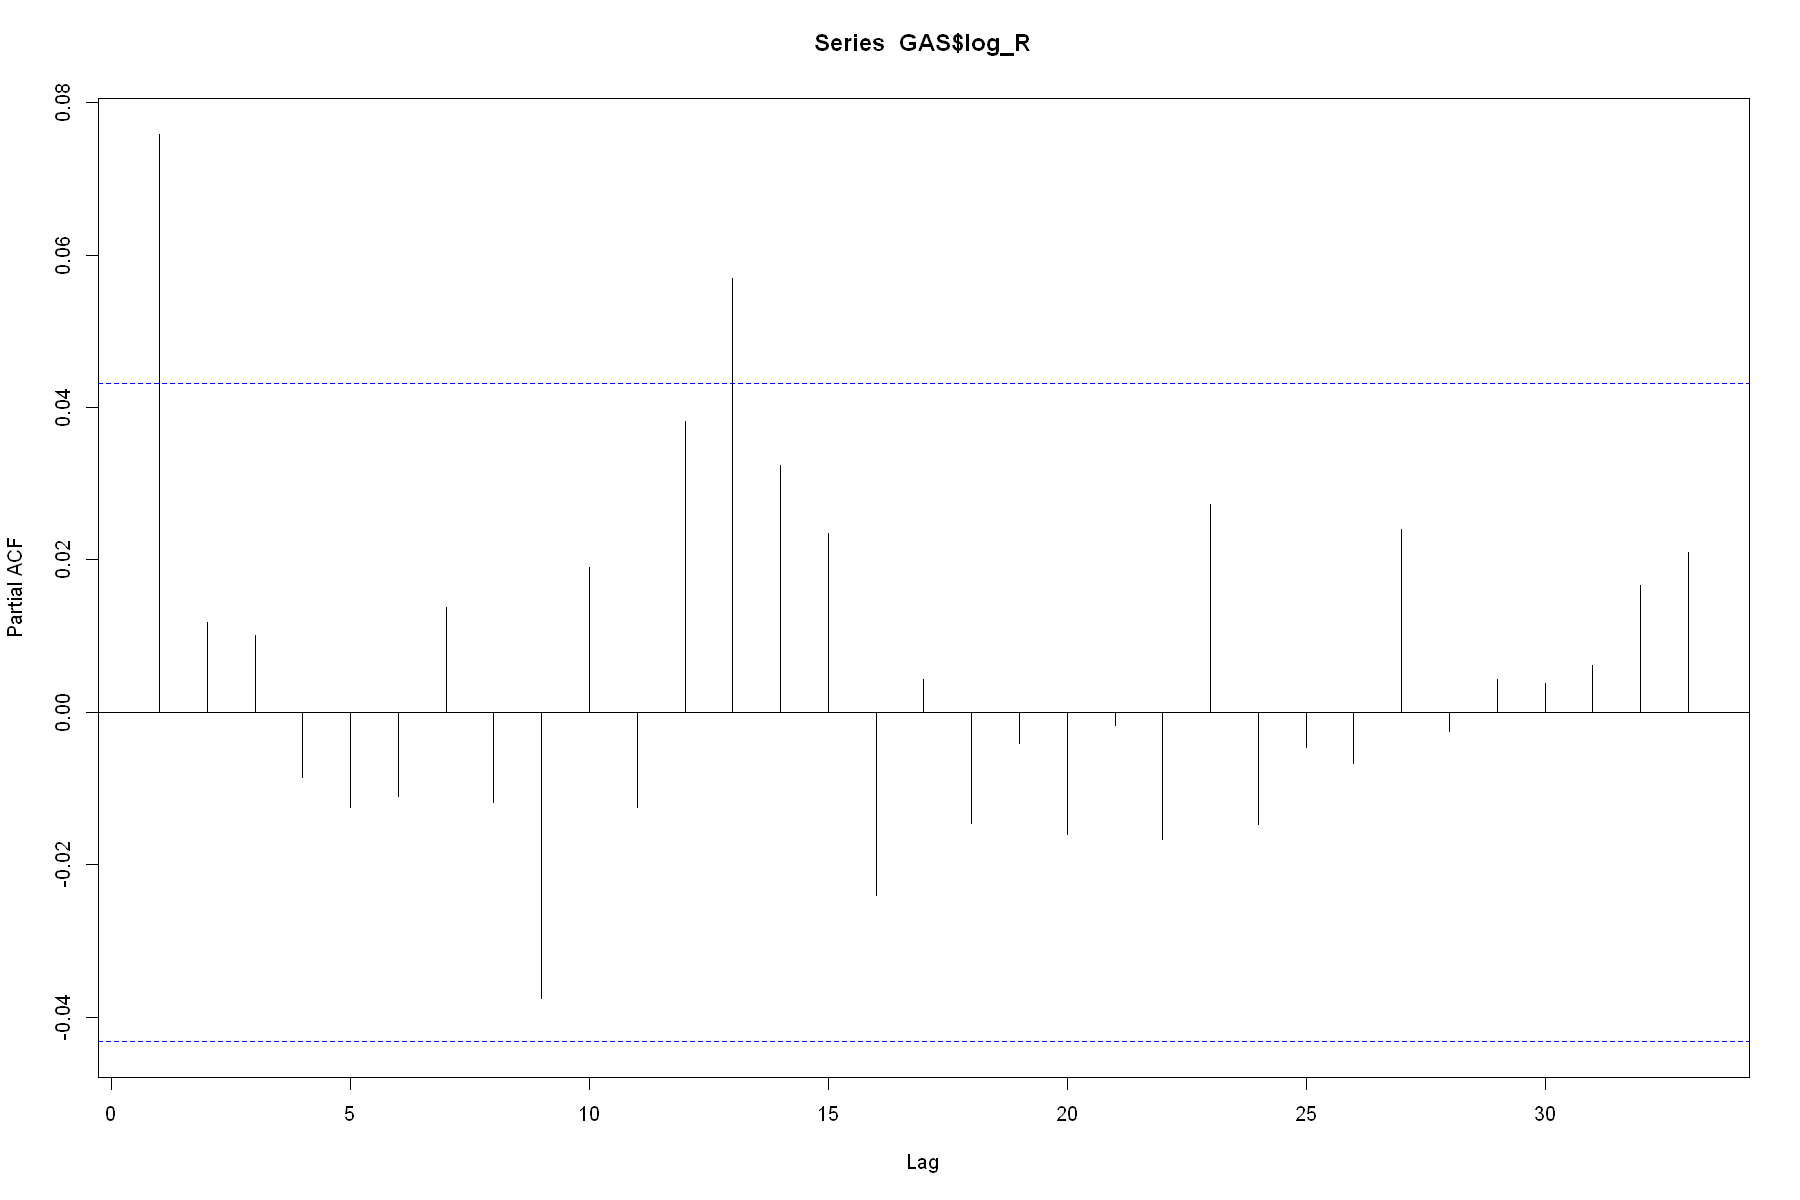

In [33]:
pacf(GAS$log_R)

* Box-Pierce test:

$H_0$ : không có hiện tượng tự tương quan

$H_1$ : ít nhất có tương quan của 1 ngày nào đó có ý nghĩa

In [34]:
Box.test(GAS$log_R)


	Box-Pierce test

data:  GAS$log_R
X-squared = 11.845, df = 1, p-value = 0.0005783


$=>$ bác bỏ $H_0$

## 4. Time series model:

### 4.1 AR model:

In [35]:
model1 <- ar(x = GAS$log_R[,1] , method = c('mle'))

In [37]:
model1


Call:
ar(x = GAS$log_R[, 1], method = c("mle"))

Coefficients:
     1  
0.0761  

Order selected 1  sigma^2 estimated as  0.0004824

In [38]:
print(model1$aic)

        0         1         2         3         4         5         6         7 
 9.926020  0.000000  1.712982  3.500869  5.357667  7.032164  8.783210 10.387213 
        8         9        10        11        12 
12.095363 11.148179 12.400502 14.072090 13.043532 


``` Biến lag 1 có AIC nhỏ nhất ```

```{r}

model2 <- arima(x = GAS$log_R, order = c(p, d, q))
p là bậc của ar
q là bậc của ma
d bậc sai phân ( đối với dữ liệu chưa có tính dừng ) 

```

In [39]:
model2 <- arima(x = GAS$log_R, c(1,0,0))

```
intercept chính là mean
t-stat = hệ số chia s.e
```

In [40]:
model2


Call:
arima(x = GAS$log_R, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.0761      3e-04
s.e.  0.0220      5e-04

sigma^2 estimated as 0.0004824:  log likelihood = 4945.12,  aic = -9884.24

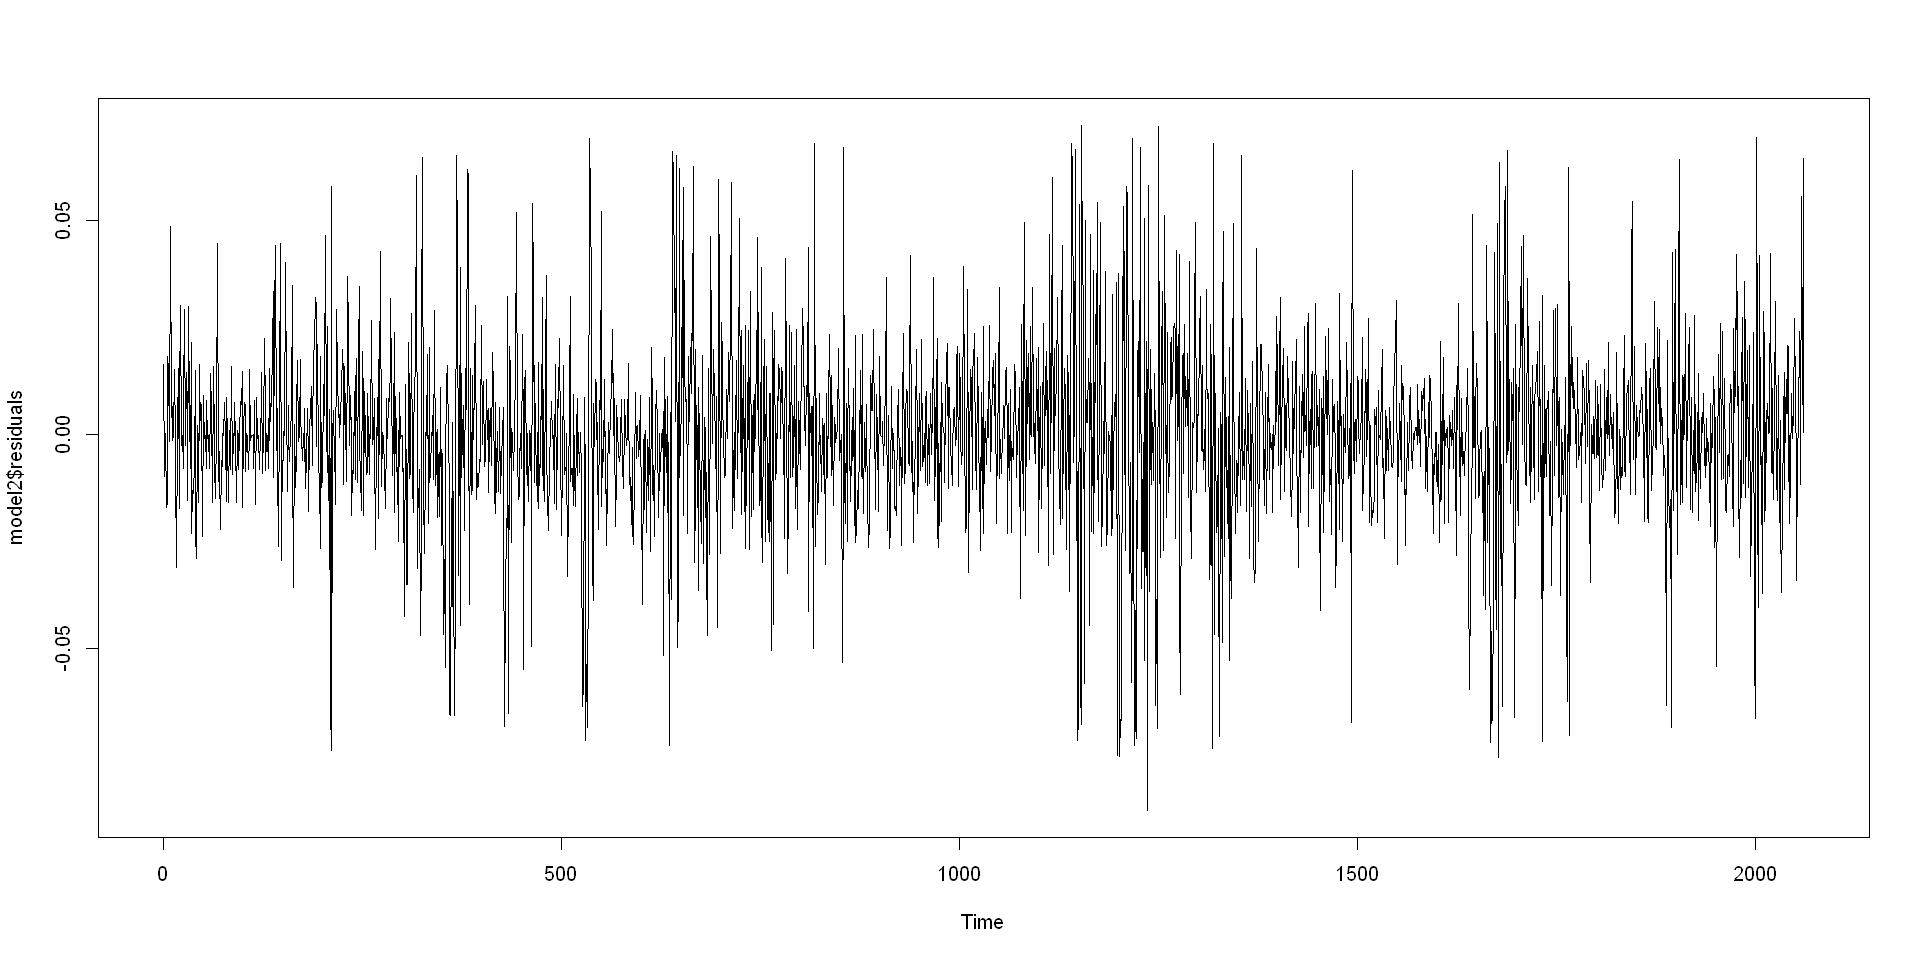

In [41]:
fig(16,8)
plot(model2$residuals)

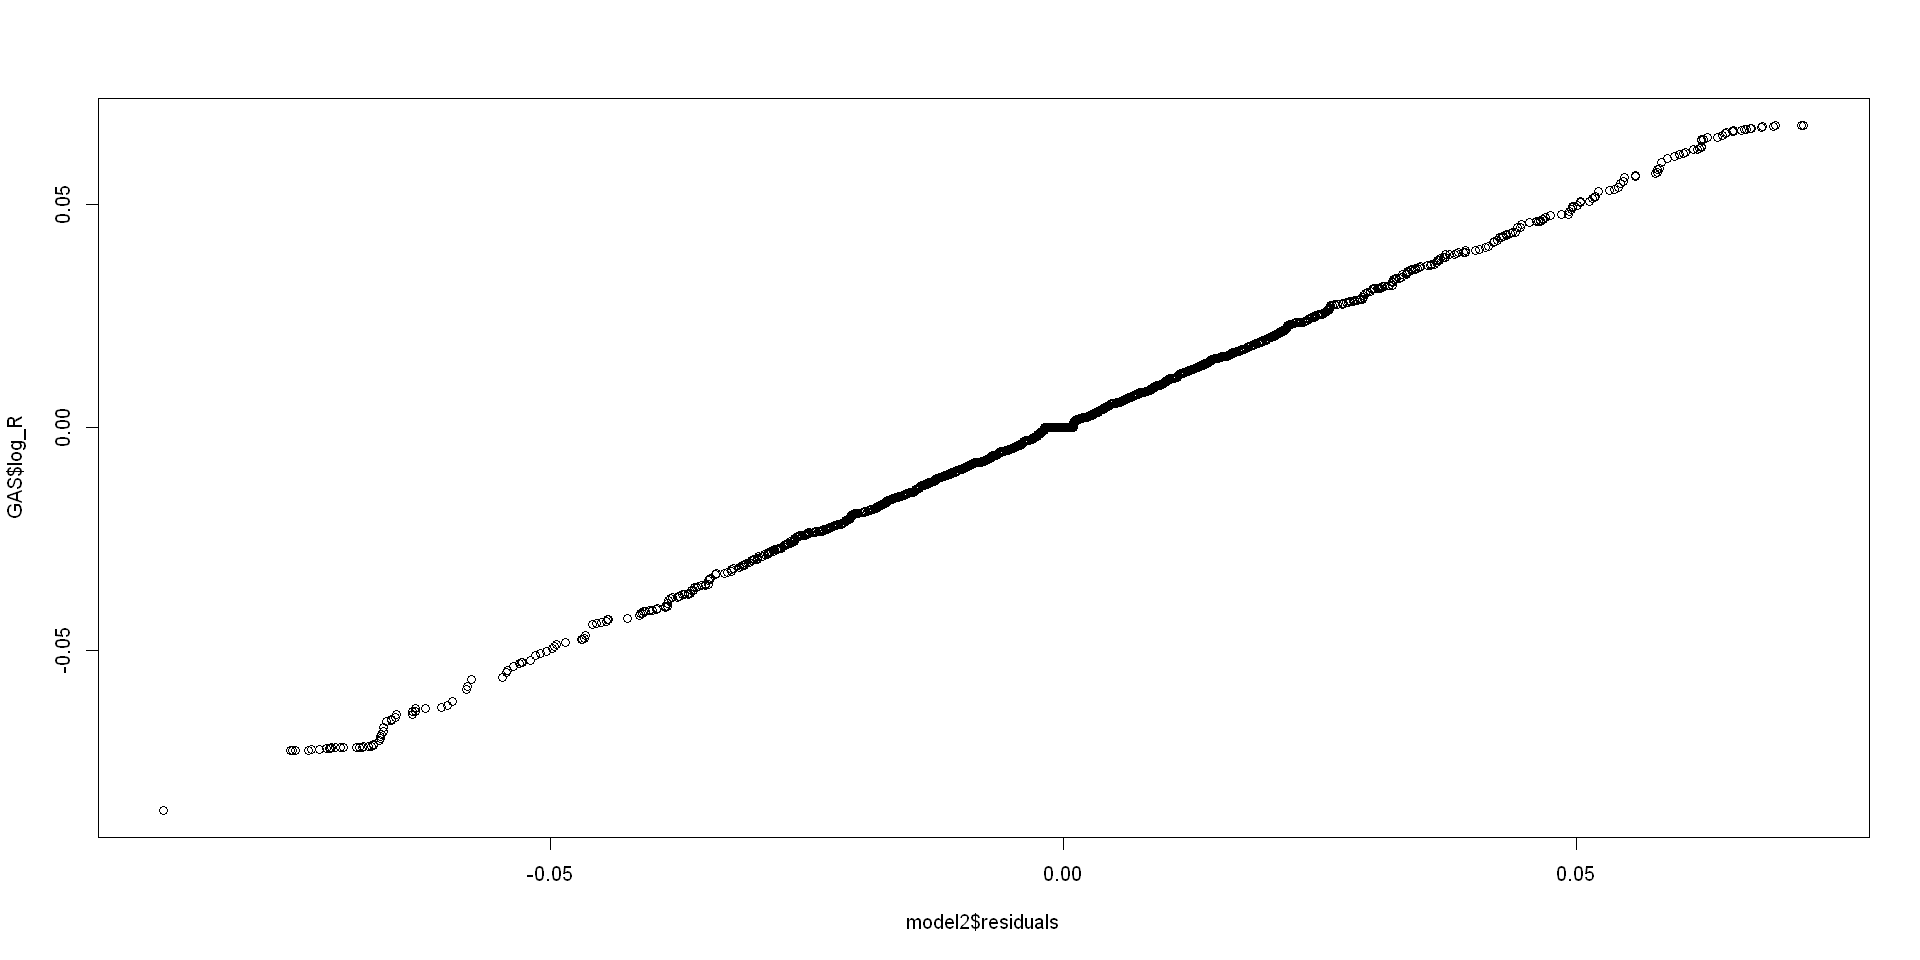

In [42]:
qqplot(model2$residuals, GAS$log_R)

* Kiểm định Box test cho phần dư

In [43]:
Box.test(model2$residuals, lag = 1)


	Box-Pierce test

data:  model2$residuals
X-squared = 0.0015941, df = 1, p-value = 0.9682


* dự báo:

In [44]:
predict(model2, 5)

$pred
Time Series:
Start = 2062 
End = 2066 
Frequency = 1 
[1] 0.0051842840 0.0006423095 0.0002966193 0.0002703087 0.0002683062

$se
Time Series:
Start = 2062 
End = 2066 
Frequency = 1 
[1] 0.02196470 0.02202823 0.02202860 0.02202860 0.02202860

### 4.2 ARIMA model:

In [45]:
model3 <- arima(x = GAS$log_R, c(1,0,1))

In [46]:
model3


Call:
arima(x = GAS$log_R, order = c(1, 0, 1))

Coefficients:
         ar1      ma1  intercept
      0.2062  -0.1307      3e-04
s.e.  0.2903   0.2933      5e-04

sigma^2 estimated as 0.0004824:  log likelihood = 4945.28,  aic = -9882.56

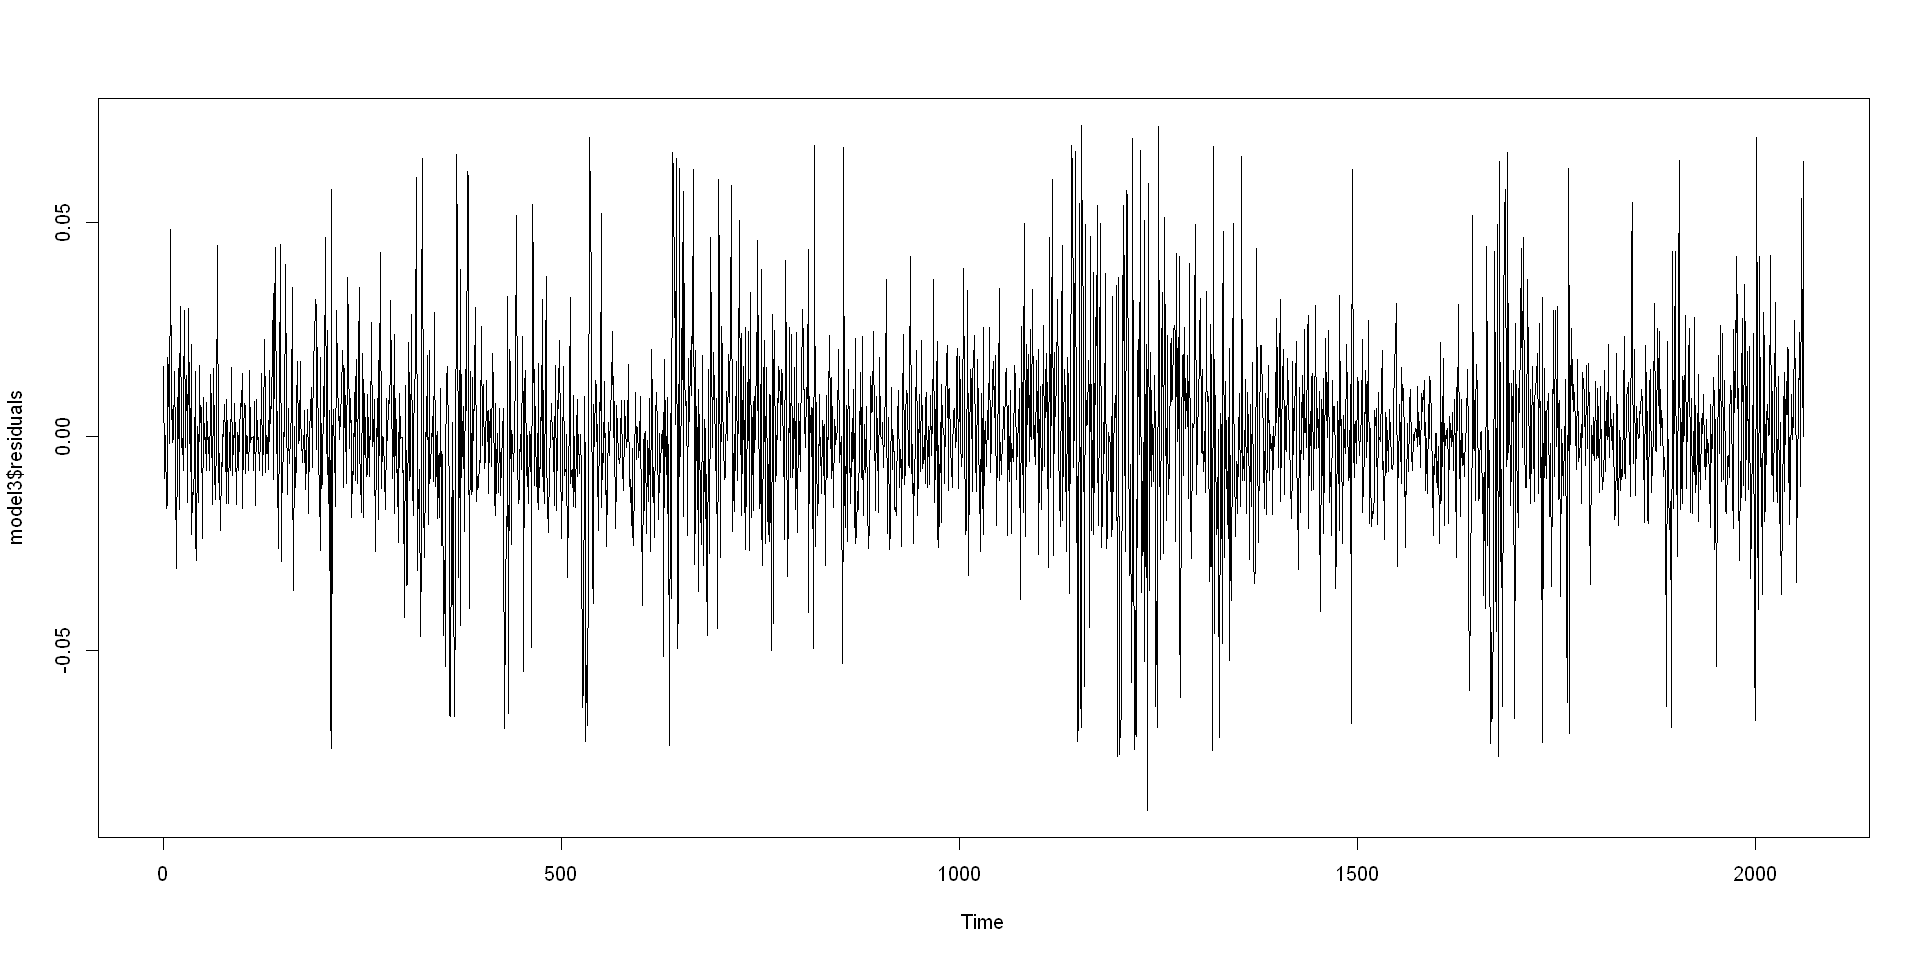

In [47]:
plot(model3$residuals)

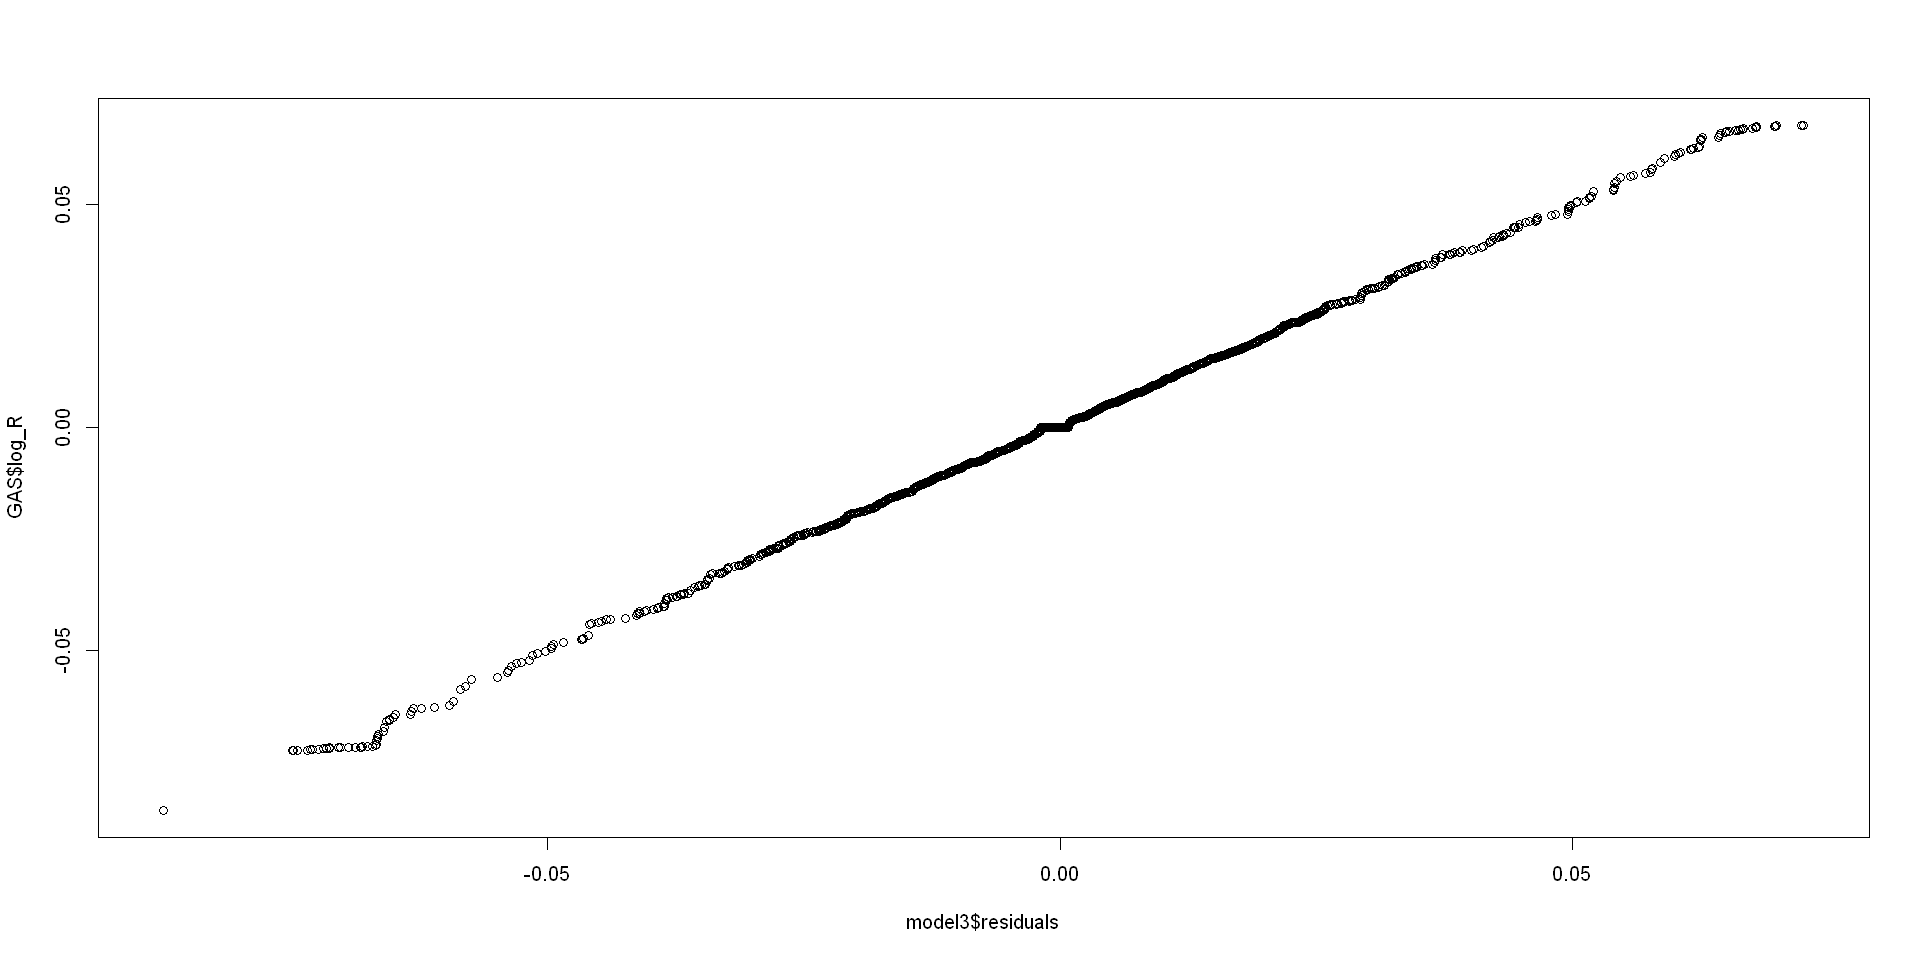

In [48]:
qqplot(model3$residuals, GAS$log_R)

* Kiểm định Box test cho phần dư

In [49]:
Box.test(model3$residuals, lag = 10)


	Box-Pierce test

data:  model3$residuals
X-squared = 5.2805, df = 10, p-value = 0.8717


* Dự báo

In [50]:
predict(model3, 5)

$pred
Time Series:
Start = 2062 
End = 2066 
Frequency = 1 
[1] 0.0051890039 0.0012790726 0.0004728635 0.0003066270 0.0002723498

$se
Time Series:
Start = 2062 
End = 2066 
Frequency = 1 
[1] 0.02196298 0.02202547 0.02202812 0.02202823 0.02202824

### 4.3 Volatility và GARCH:

In [51]:
model4 <- garchFit(~garch(1,0), data=GAS$log_R, trace = F)

Warning message:
"Using formula(x) is deprecated when x is a character vector of length > 1.
  Consider formula(paste(x, collapse = " ")) instead."


In [52]:
summary(model4)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(1, 0), data = GAS$log_R, trace = F) 

Mean and Variance Equation:
 data ~ garch(1, 0)
<environment: 0x0000000029a916c0>
 [data = GAS$log_R]

Conditional Distribution:
 norm 

Coefficient(s):
        mu       omega      alpha1  
0.00037753  0.00033198  0.31355630  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu     3.775e-04   4.386e-04    0.861    0.389    
omega  3.320e-04   1.356e-05   24.490   <2e-16 ***
alpha1 3.136e-01   3.676e-02    8.529   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 5052.02    normalized:  2.451247 

Description:
 Mon Oct 04 05:48:24 2021 by user: HP 


Standardised Residuals Tests:
                                Statistic p-Value  
 Jarque-Bera Test   R    Chi^2  368.8769  0        
 Shapiro-Wilk Test  R    W      0.9689136 0        
 Ljung-Box Test     R    Q(10)  11.60911  0.3120687
 Ljung-Bo

* dự báo 

In [53]:
predict(model4, 5)

meanForecast,meanError,standardDeviation
<dbl>,<dbl>,<dbl>
0.0003775261,0.04044466,0.04044466
0.0003775261,0.02906695,0.02906695
0.0003775261,0.02443156,0.02443156
0.0003775261,0.02278472,0.02278472
0.0003775261,0.02224325,0.02224325


#### Garch:

In [54]:
model5 <- garchFit(~garch(1,1), data=GAS$log_R, trace = F) 

Warning message:
"Using formula(x) is deprecated when x is a character vector of length > 1.
  Consider formula(paste(x, collapse = " ")) instead."


In [55]:
summary(model5)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(1, 1), data = GAS$log_R, trace = F) 

Mean and Variance Equation:
 data ~ garch(1, 1)
<environment: 0x000000002a681578>
 [data = GAS$log_R]

Conditional Distribution:
 norm 

Coefficient(s):
        mu       omega      alpha1       beta1  
5.5543e-04  2.7432e-05  1.2779e-01  8.1490e-01  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu     5.554e-04   4.089e-04    1.358    0.174    
omega  2.743e-05   6.004e-06    4.569 4.90e-06 ***
alpha1 1.278e-01   1.749e-02    7.307 2.72e-13 ***
beta1  8.149e-01   2.544e-02   32.036  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 5135.421    normalized:  2.491713 

Description:
 Mon Oct 04 05:48:27 2021 by user: HP 


Standardised Residuals Tests:
                                Statistic p-Value   
 Jarque-Bera Test   R    Chi^2  274.2207  0         
 Shapiro-Wilk Test  R    W      0.9

#### urgarch:

In [56]:
model6 <- ugarchspec(mean.model = list(armaOrder = c(0,0)), variance.model = list(model = 'iGARCH', garchOrder = c(1,1)))

In [57]:
model61 <- ugarchfit(spec = model6, data = GAS$log_R)

In [58]:
model61


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: iGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000540    0.000407   1.3275  0.18434
omega   0.000013    0.000002   7.7502  0.00000
alpha1  0.156836    0.014767  10.6204  0.00000
beta1   0.843164          NA       NA       NA

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000540    0.000389   1.3884  0.16503
omega   0.000013    0.000001   9.1162  0.00000
alpha1  0.156836    0.018012   8.7072  0.00000
beta1   0.843164          NA       NA       NA

LogLikelihood : 5122.863 

Information Criteria
------------------------------------
                    
Akaike       -4.9683
Bayes        -4.9601
Shibata      -4.9683
Hannan-Quinn -4.9653

Weig

## 5. ước lượng VaR:

In [74]:
#install.packages('forecast', 'gridExtra')
library(forecast)
library(gridExtra)

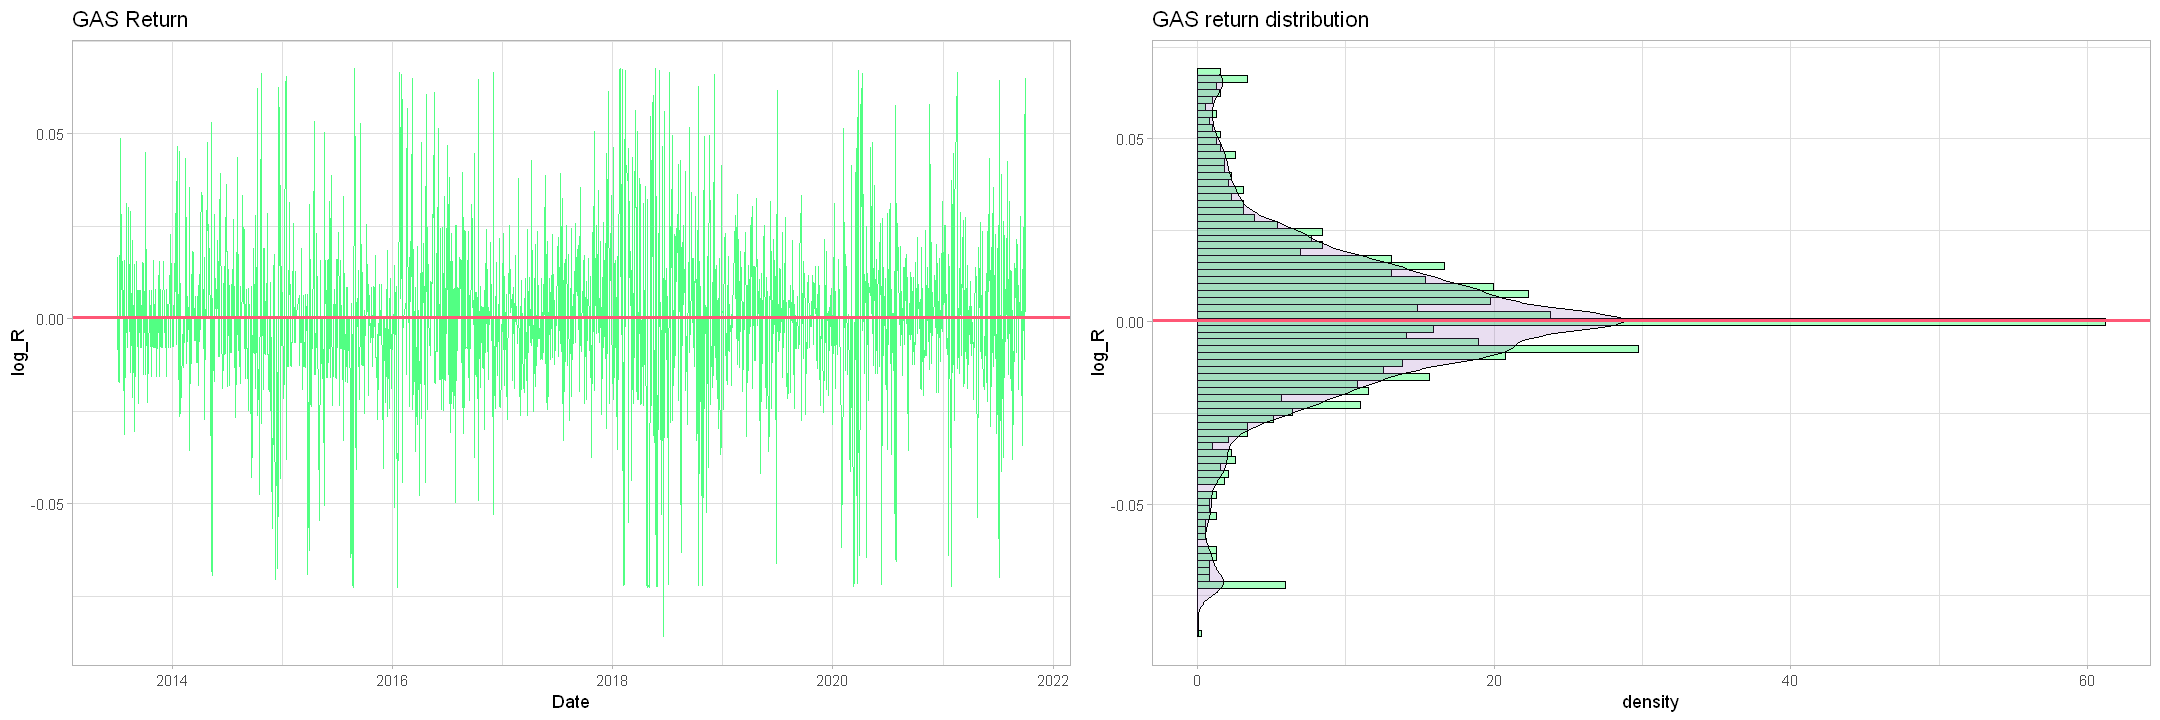

In [75]:
fig(18,6)
t1 <- ggplot(GAS, aes(x=Date)) + geom_line(aes(y = log_R),
                                color='#52ff83', alpha = 1) + ggtitle("GAS Return") + geom_hline(yintercept = mean(GAS$log_R), 
                                color = '#ff5776' , size = 1) + theme_light()
                                
t2 <- ggplot(GAS, aes(x=log_R)) + 
 geom_histogram(aes(y=..density..), colour="black", alpha=0.5, fill='#52ff83', bins = 82)+
 geom_density(alpha=.2, fill="#905cb8") + coord_flip() + geom_vline(xintercept = mean(GAS$log_R ) , 
 color = '#ff5776' , size = 1) + ggtitle("GAS return distribution") + theme_light()

grid.arrange(t1 ,t2 , ncol = 2)


### 5.1 Riskmetrics method :

In [76]:
GAS$neg_log_R = -GAS$log_R

In [62]:
spec1 <- ugarchspec(mean.model = list(armaOrder = c(2, 0)), variance.model = list(model= 'iGARCH', garchOrder = c(1,1)))
model11 = ugarchfit(spec=spec1, data = GAS$neg_log_R)

In [63]:
ugarchforecast(model11, n.ahead = 1)

Warning message in `setfixed<-`(`*tmp*`, value = as.list(pars)):
"Unrecognized Parameter in Fixed Values: beta1...Ignored"



*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: iGARCH
Horizon: 1
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=1975-08-24 07:00:00]:
       Series   Sigma
T+1 -0.005597 0.03406



$ => VaR_{95\%} $ = 0 + 1.65 x 0.3406

In [64]:
0 + 1.65 * 0.03406

[1] 0.056199

### 5.2 Rmeasure :

In [65]:
source('Rmeasure.R')

In [66]:
RMeasure(0, 0.03406)


 Risk Measures for selected probabilities: 
      prob        VaR        ES
[1,] 0.950 0.05602371 0.0702560
[2,] 0.990 0.07923541 0.0907772
[3,] 0.999 0.10525331 0.1146831


In [110]:
VaR.hist1 <- -0.05602371
ES.hist1 <- -0.0702560
ES.hist1

[1] -0.070256

In [134]:
fig(10,10)
p2 <- ggplot(GAS, aes(x=log_R)) + 
 geom_histogram(aes(y=..density..), colour="black", alpha=0.5, fill='#FF6666', bins = 100)+
 geom_density(alpha=.2, fill="#905cb8") + theme_light() 
p2 <- p2 + geom_vline(aes(xintercept = VaR.hist1), linetype = "dashed", size = 1, color = "blue") 
p2 <- p2 + geom_vline(aes(xintercept = ES.hist1), size = 1, color = "blue")
p2 <- p2+annotate("text", x = -0.048, y = 40, label = VaR.hist1)+annotate("text", x=-0.048, y = 44, label = 'VaR 95%')
p2 <- p2 +annotate("text", x = -0.076, y = 40, label = ES.hist1)+annotate("text", x=-0.076, y = 44, label = 'ES')
p2 <- p2 + ggtitle('Rmeasure VaR')

### 5.2 quantile esti method :

In [67]:
quantile(GAS$log_R, 0.95)

95% 
0.03780236

In [78]:
(VaR.hist <- -quantile(GAS$log_R, probs = 0.95, 
    names = FALSE))

[1] -0.03780236

In [79]:
(ES.hist <- mean(GAS$log_R[GAS$log_R < VaR.hist]))

[1] -0.05711477

In [132]:
fig(10,5)
p <- ggplot(GAS, aes(x=log_R)) + 
 geom_histogram(aes(y=..density..), colour="black", alpha=0.5, fill='#FF6666', bins = 100)+
 geom_density(alpha=.2, fill="#905cb8") + theme_light() 
p <- p + geom_vline(aes(xintercept = VaR.hist), linetype = "dashed", size = 1, color = "blue") 
p <- p + geom_vline(aes(xintercept = ES.hist), size = 1, color = "blue")
p <- p + annotate("text", x = -0.02740, y = 40, label = VaR.hist) + annotate("text", x = -0.02940, y = 44, label = 'VaR 95%')
p <- p + annotate("text", x = -0.067114, y = 40, label = ES.hist) + annotate("text", x = -0.067114, y = 44, label = 'ES')
p <- p + ggtitle('quantile esti method VaR')

### 5.3 Monte carlo method :

In [91]:
mean1 <- mean(GAS$log_R)
std1 <- sd(GAS$log_R)
mean1

[1] 0.0002686052

In [92]:
std1

[1] 0.02203372

In [93]:
set.seed(20)
sim_monte_carlo <- rnorm(30000, mean=mean1, sd = std1)

In [ ]:
fig(15,6)
p1 <- ggplot() + geom_histogram(color = 'black', aes(x=sim_monte_carlo),alpha=0.2, fill='#FF6666' ,bins = 82) +  theme_light()
p1

In [136]:
quantile(sim_monte_carlo, 0.95)

95% 
0.03673469

In [138]:
(VaR.hist2 <- -quantile(sim_monte_carlo, probs = 0.95, 
    names = FALSE))

(ES.hist2 <- mean(sim_monte_carlo[sim_monte_carlo < VaR.hist2]))

[1] -0.03673469

[1] -0.04592961

In [157]:
p3 <- ggplot(GAS, aes(x=log_R)) + 
 geom_histogram(aes(y=..density..), colour="black", alpha=0.5, fill='#FF6666', bins = 100)+
 geom_density(alpha=.2, fill="#905cb8") + theme_light() 
p3 <- p3 + geom_vline(aes(xintercept = VaR.hist2), linetype = "dashed", size = 1, color = "blue") 
p3 <- p3 + geom_vline(aes(xintercept = ES.hist2), size = 1, color = "blue")
p3 <- p3 + annotate("text", x = -0.02640, y = 40, label = VaR.hist2) +annotate("text", x = -0.02640, y = 44, label = 'VaR 95%')
p3 <- p3 + annotate("text", x = -0.061114, y = 40, label = ES.hist2) +annotate("text", x = -0.061114, y = 44, label = 'ES')
p3 <- p3 + ggtitle('Monte carlo method VaR')

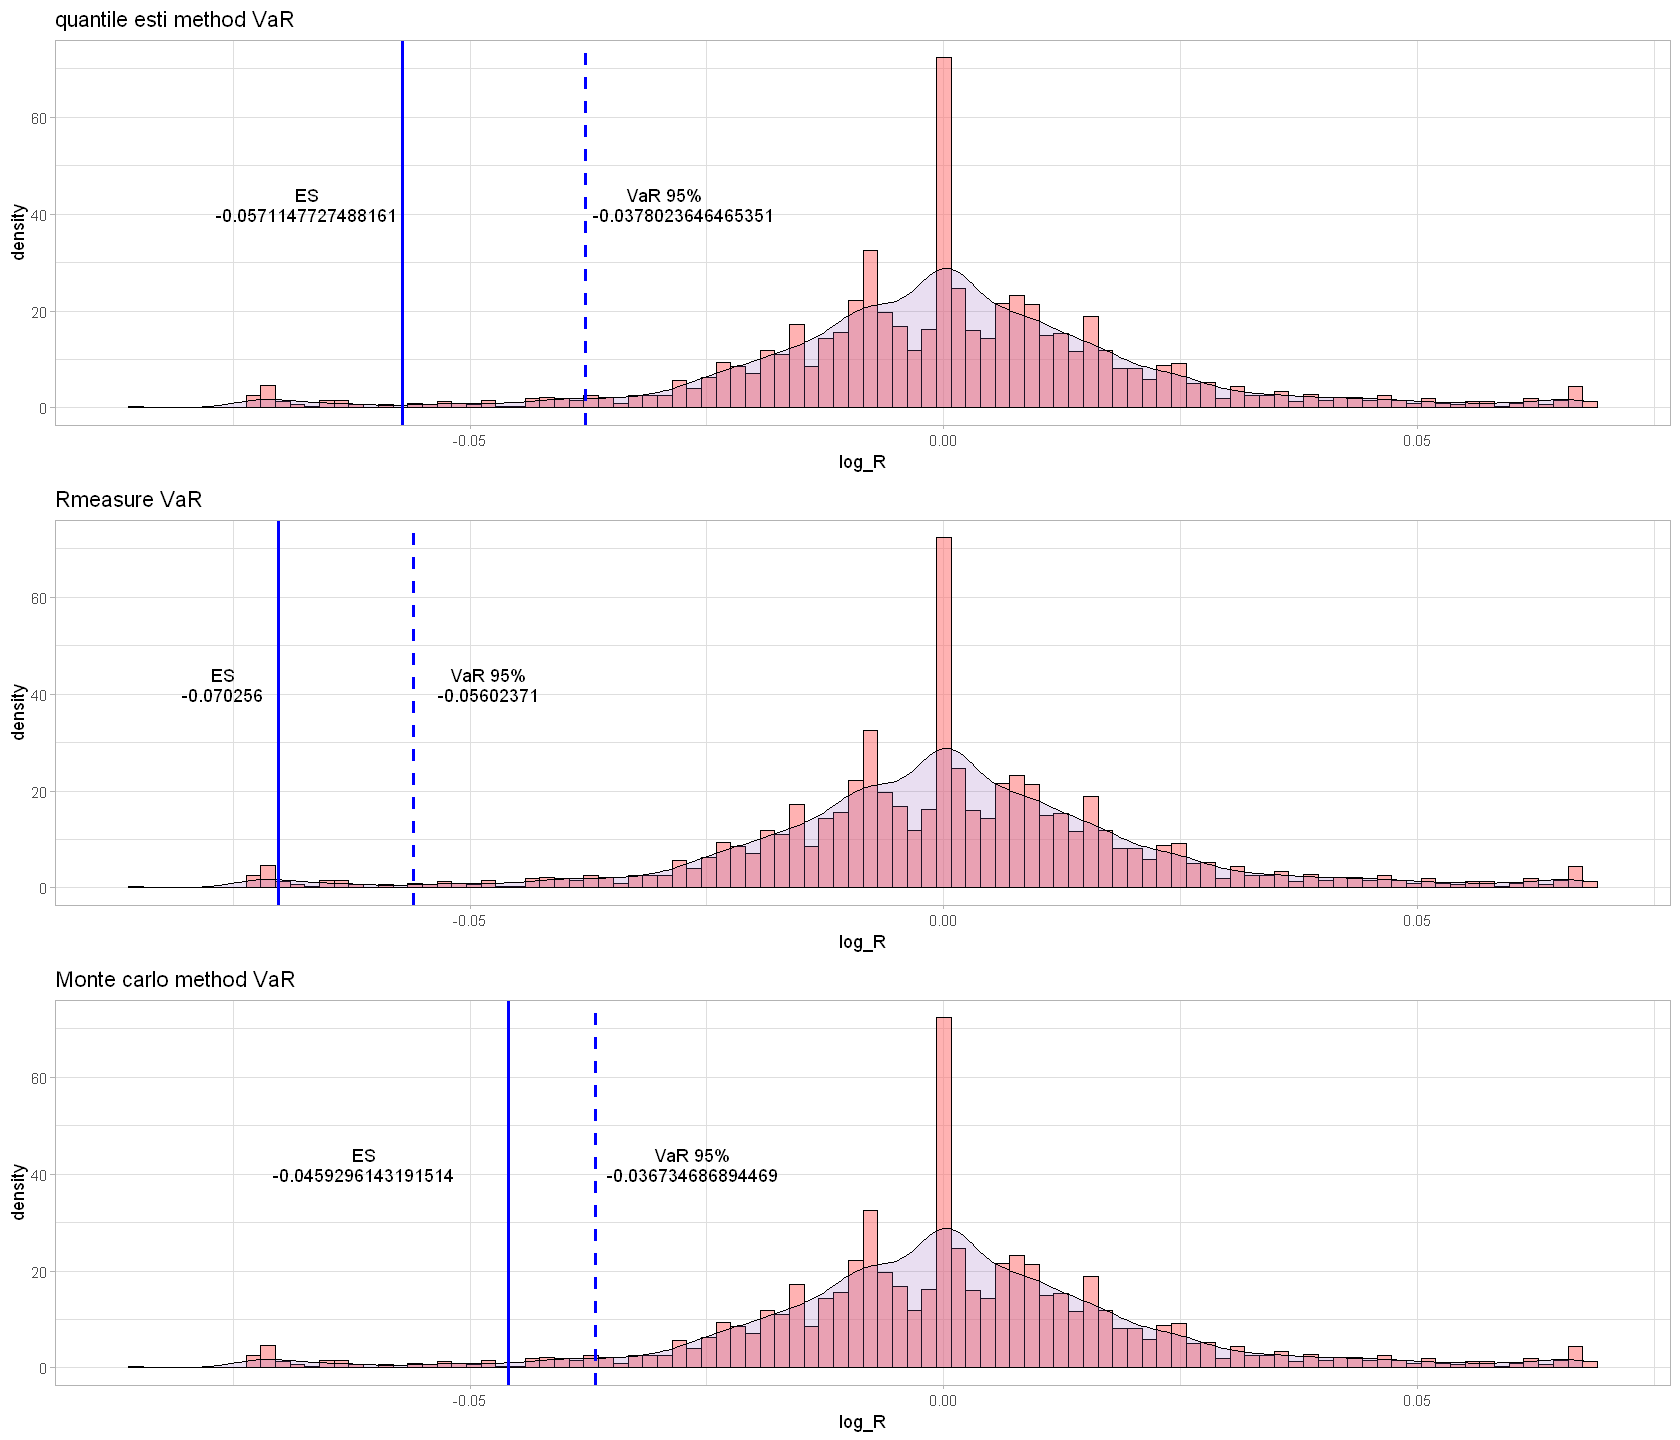

In [158]:
fig(14, 12)
grid.arrange(p ,p2, p3, nrow = 3)

***